In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


df=pd.read_csv("../diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<AxesSubplot: xlabel='gender', ylabel='age'>

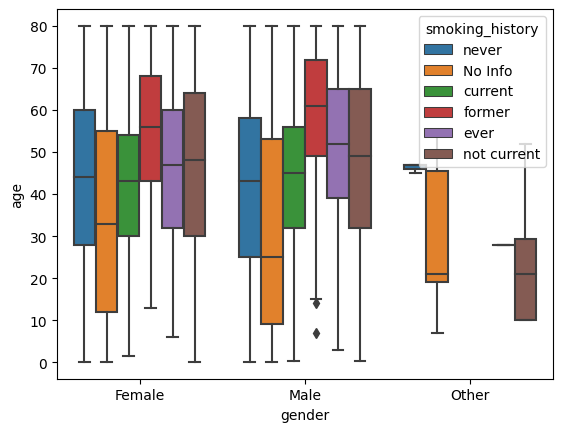

In [3]:
sns.boxplot(x=df["gender"],y=df["age"],hue=df["smoking_history"])

C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_11232\454048171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p["blood_glucose_level"],label=i)
C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_11232\454048171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p["blood_glucose_level"]

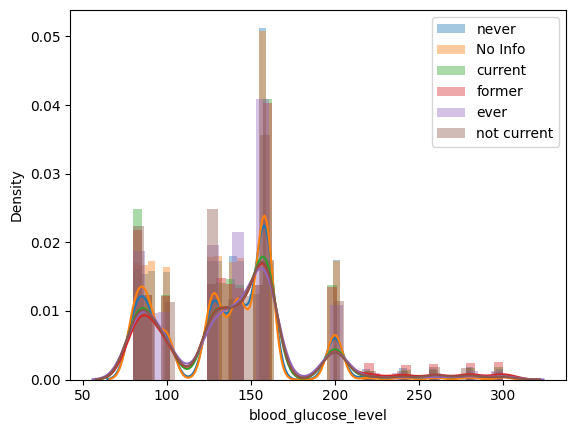

In [4]:
for i in df.smoking_history.unique():
    p=df[df["smoking_history"]==i]
    sns.distplot(p["blood_glucose_level"],label=i)

plt.legend()

In [5]:
import sklearn

<AxesSubplot: xlabel='gender', ylabel='blood_glucose_level'>

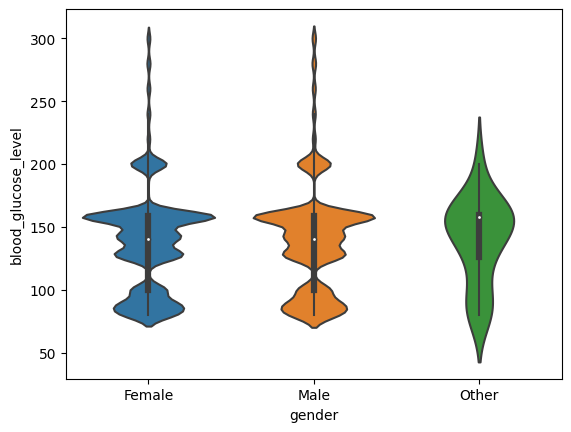

In [6]:
sns.violinplot(x=df["gender"],y=df["blood_glucose_level"])

In [13]:
x=df.drop(["smoking_history","gender"],axis=1).values
y=df["age"].values
xtr,xts,ytr,yts=sklearn.model_selection.train_test_split(x,y,random_state=0)
from sklearn.linear_model import LinearRegression
m=LinearRegression()
m.fit(xtr,ytr)
m.predict(xts)


# sklearn.metrics.accuracy_score(yts,m.predict(xts))

AttributeError: module 'sklearn' has no attribute 'model_selection'

In [14]:
import sklearn

In [11]:
x=df.drop(["smoking_history","gender"],axis=1).values
y=df["gender"].values
xtr,xts,ytr,yts=sklearn.model_selection.train_test_split(x,y,random_state=0)
from sklearn.linear_model import LogisticRegression
m=LogisticRegression()
a=sklearn.preprocessing.MinMaxScaler()
xtr_=a.fit_transform(xtr)
xts_=a.transform(xts)
m.fit(xtr_,ytr)
m.predict(xts_)
sklearn.metrics.accuracy_score(m.predict(xts),yts)

AttributeError: module 'sklearn' has no attribute 'model_selection'

In [15]:
x=df[["age","blood_glucose_level"]].values
x


array([[ 80., 140.],
       [ 54.,  80.],
       [ 28., 158.],
       ...,
       [ 66., 155.],
       [ 24., 100.],
       [ 57.,  90.]])

c:\Users\NEERA KUMARI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


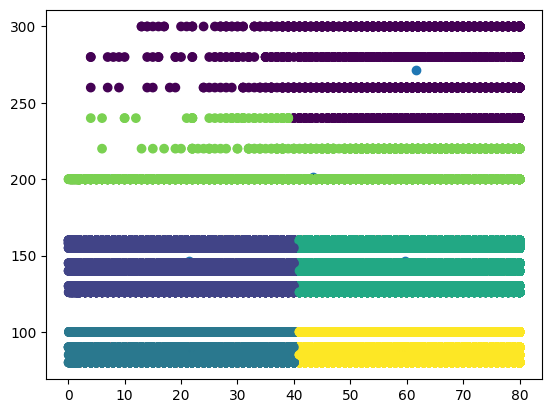

In [16]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=6)
k.fit(x)

plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1])
plt.scatter(x[:,0],x[:,1],c=k.labels_)



In [18]:
from sklearn.preprocessing import MinMaxScaler
n=MinMaxScaler()


In [19]:
from sklearn.ensemble import RandomForestClassifier
a=RandomForestClassifier(n_estimators=3,min_samples_leaf=2,min_samples_split=3)
a.fit(xtr_,ytr)
a.predict(xts_)

from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
g=Pipeline([("h",MinMaxScaler()),("q",LogisticRegression())])

g.fit(xtr,ytr)
accuracy_score(yts,g.predict(xts))


NameError: name 'xtr_' is not defined

<AxesSubplot: xlabel='gender', ylabel='blood_glucose_level'>

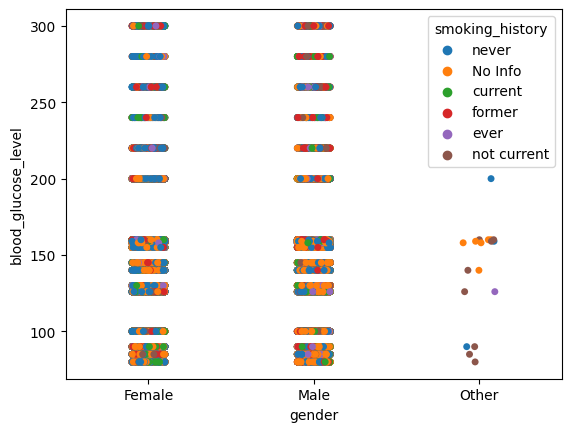

In [25]:
sns.stripplot(x=df["gender"],y=df["blood_glucose_level"],hue=df["smoking_history"])

<AxesSubplot: ylabel='blood_glucose_level'>

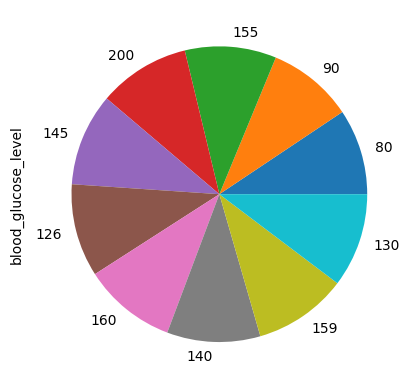

In [28]:
df["blood_glucose_level"].value_counts().sort_values().tail(10).plot(kind="pie")

<AxesSubplot: xlabel='smoking_history', ylabel='gender'>

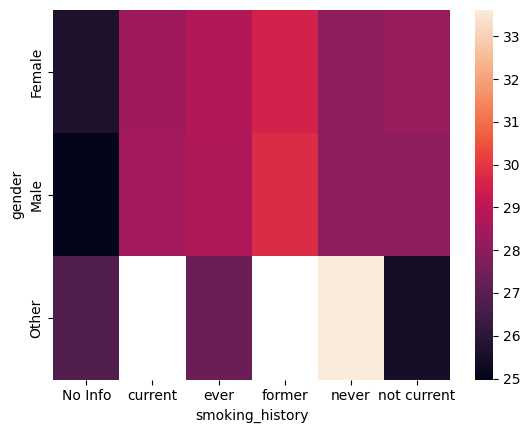

In [30]:
a=df.pivot_table(index="gender",columns="smoking_history",values="bmi",aggfunc="mean")
sns.heatmap(a)

Text(0.5, 1.0, 'hypertension,heart_disease,diabetes')

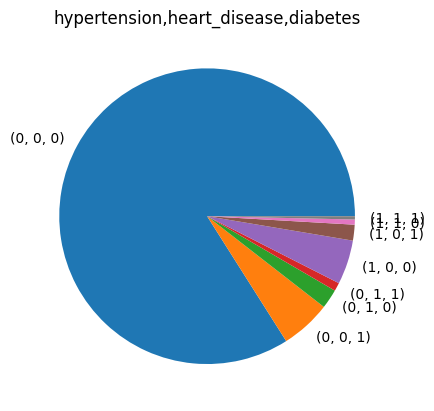

In [36]:
df.groupby(["hypertension","heart_disease","diabetes"]).size().plot(kind="pie")
plt.title("hypertension,heart_disease,diabetes")

<AxesSubplot: xlabel='smoking_history', ylabel='count'>

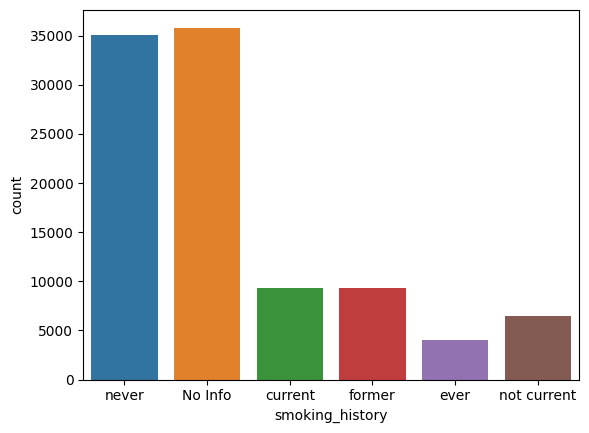

In [39]:
sns.countplot(x=df["smoking_history"])

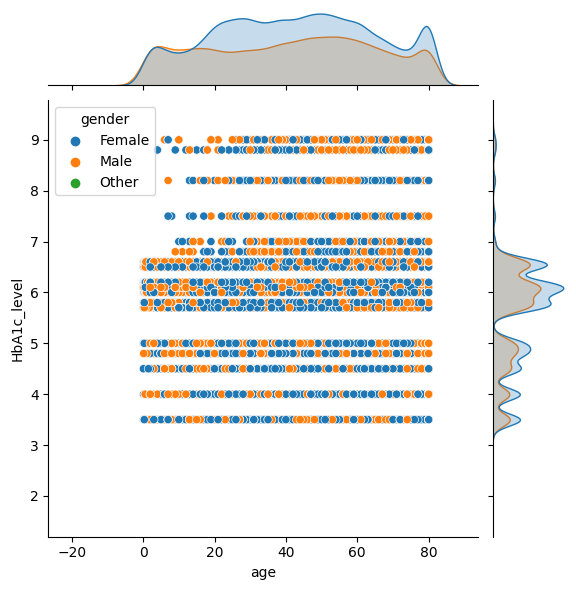

In [43]:
sns.jointplot(y=df["HbA1c_level"],x=df["age"],hue=df['gender'])

C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_11232\2755835793.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p["age"],label="Female")
C:\Users\NEERA KUMARI\AppData\Local\Temp\ipykernel_11232\2755835793.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(p["age"],label="Male")
c:\Users

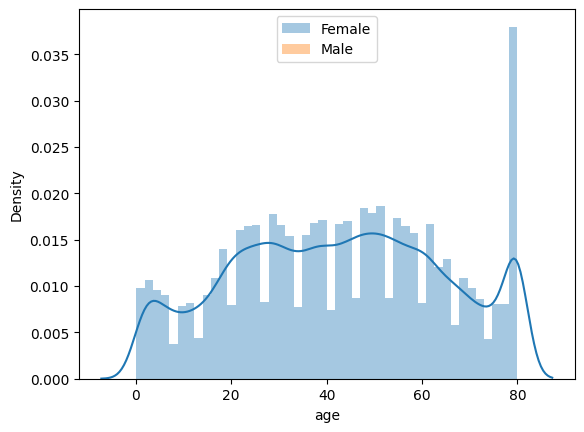

In [45]:
p=df[df["gender"]=="Female"]
sns.distplot(p["age"],label="Female")
p=df[df["gender"]=="male"]
sns.distplot(p["age"],label="Male")
plt.legend()

(array([28144.,     0., 30907., 30072.,     0.,  7600.,   603.,   636.,
          635.,  1403.]),
 array([ 80., 102., 124., 146., 168., 190., 212., 234., 256., 278., 300.]),
 <BarContainer object of 10 artists>)

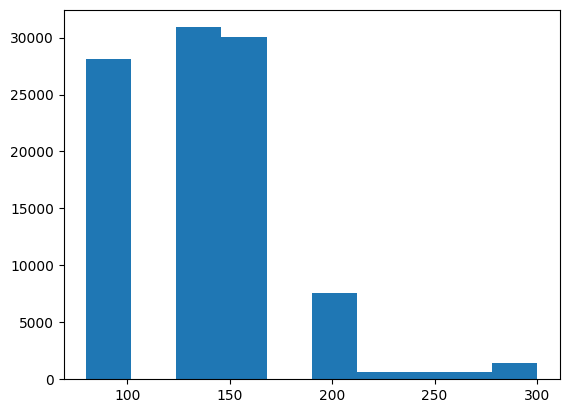

In [47]:
plt.hist(df["blood_glucose_level"])

(array([15204.,  7585., 15068.,     0., 41346., 17544.,   634.,   643.,
          661.,  1315.]),
 array([3.5 , 4.05, 4.6 , 5.15, 5.7 , 6.25, 6.8 , 7.35, 7.9 , 8.45, 9.  ]),
 <BarContainer object of 10 artists>)

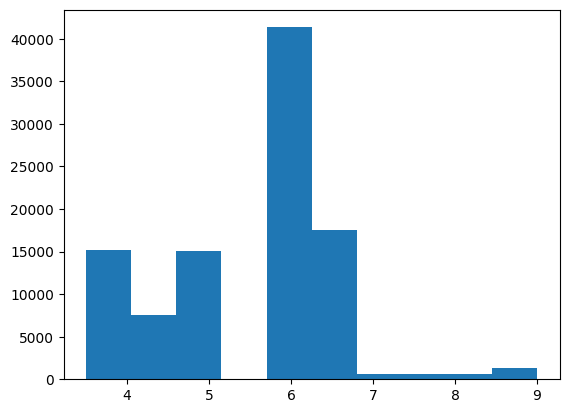

In [46]:
plt.hist(df["HbA1c_level"])

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
